# WeatherPy
----


### WeatherPy Observations

Looking at the sample selected, as a whole after removing outliers, the average maximum temperature was approximately 48 degrees Fahrenheit with a comparatively high standard deviation of approximately 35 degrees which indicates that the average is really not representative of the sample.  Given how broad this sample was across latitudes this really is not surprising.

Overall, temperatures have a stronger correlation to latitude while cloudiness, humidity and wind speed really did not have much of a correlation.  

When breaking down the data by hemisphere, in the Northern Hemisphere, the average temperature is approximately 35 degrees with still a very large standard deviation of 36 degrees. 

In the Southern Hemisphere, the average temperature is approximately 73 degrees with a standard deviation of 10 degrees, which would indicate that the mean in the Southern Hemisphere is much more representative than in the Northern Hemisphere.  

In the Northern Hemisphere there is a negative correlation and linear regression as latitude increases. 

In the Southern Hemisphere, there is a positive correlation and linear regression as latitude increases.  

For both hemispheres the respective samples show a clear relationship between weather and latitude but very little relationship between latitude and humidity, cloudiness and wind speed.  


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests
from sklearn import datasets

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
cities

['rosarito',
 'ereymentau',
 'punta arenas',
 'mataura',
 'upernavik',
 'port alfred',
 'taolanaro',
 'ponta do sol',
 'ushuaia',
 'high rock',
 'bethel',
 'ruatoria',
 'illoqqortoormiut',
 'alofi',
 'port augusta',
 'albany',
 'hilo',
 'ketchikan',
 'kavieng',
 'ribeira grande',
 'mumford',
 'sambava',
 'santa isabel',
 'tuktoyaktuk',
 'port lincoln',
 'constitucion',
 'atuona',
 'tsihombe',
 'mushie',
 'sitka',
 'ilebo',
 'east london',
 'hithadhoo',
 'portland',
 'provideniya',
 'hofn',
 'new norfolk',
 'kapaa',
 'makat',
 'ambilobe',
 'hobart',
 'rikitea',
 'same',
 'isoka',
 'bluff',
 'cabo san lucas',
 'ous',
 'harrismith',
 'derbent',
 'puerto maldonado',
 'lebu',
 'norman wells',
 'arraial do cabo',
 'harper',
 'thompson',
 'oparino',
 'bosaso',
 'carnarvon',
 'axim',
 'marawi',
 'nanortalik',
 'busselton',
 'pudozh',
 'cairns',
 'hanstholm',
 'srednekolymsk',
 'lethem',
 'belaya gora',
 'butaritari',
 'rosario',
 'karratha',
 'fortuna',
 'kununurra',
 'sagone',
 'bambous virie

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#save configuration information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Build parital query
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
#Pull data to list to minimize pulls from API
responses = {city : requests.get(query_url + city).json() for city in cities}

In [7]:
#number of rows in list
len(responses)

598

In [8]:
#set up lists to hold response info

xcity = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
record = 0
xset = 1

#print log header
print('Beginning Data Retrieval')     
print('-----------------------------')

#loop through cities and request data for each city
for city in cities:
    response = responses[city]
    
    #try to request info for city, if city is in API request the following data
    try:   
        xcity.append(response['name'])
        Lat.append(response['coord']['lat']) 
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        record = record + 1
        xset = 1
        print(f"Processing Record {record} of Set {xset} | {city})")
                      
              
    #handle exceptions for cities that are not available on the API
    except KeyError:
        print('City not found. Skipping...')
    except IndexError:
        print('City not found. Skipping...')



#print log footer
print('-----------------------------')                
print('Data Retrieval Complete')     
print('-----------------------------')              
              



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | rosarito)
Processing Record 2 of Set 1 | ereymentau)
Processing Record 3 of Set 1 | punta arenas)
Processing Record 4 of Set 1 | mataura)
Processing Record 5 of Set 1 | upernavik)
Processing Record 6 of Set 1 | port alfred)
City not found. Skipping...
Processing Record 7 of Set 1 | ponta do sol)
Processing Record 8 of Set 1 | ushuaia)
Processing Record 9 of Set 1 | high rock)
Processing Record 10 of Set 1 | bethel)
City not found. Skipping...
City not found. Skipping...
Processing Record 11 of Set 1 | alofi)
Processing Record 12 of Set 1 | port augusta)
Processing Record 13 of Set 1 | albany)
Processing Record 14 of Set 1 | hilo)
Processing Record 15 of Set 1 | ketchikan)
Processing Record 16 of Set 1 | kavieng)
Processing Record 17 of Set 1 | ribeira grande)
Processing Record 18 of Set 1 | mumford)
Processing Record 19 of Set 1 | sambava)
Processing Record 20 of Set 1 | santa isabel)
Processing Recor

In [9]:
len(xcity)

549

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#Create data frame     
city_df = pd.DataFrame({
    'City' : xcity,
    'Lat' : Lat,
    'Lng' : Lng,
    'Max Temp' : Max_Temp,
    'Humidity' : Humidity,
    'Cloudiness' : Cloudiness,
    'Wind Speed' : Wind_Speed,
    'Country' : Country,
    'Date' : Date   
})

city_df.to_csv(output_data_file)

city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rosarito,32.3333,-117.0333,57.20,44,40,9.22,MX,1611770794
1,Ereymentau,51.6199,73.1033,21.70,98,88,17.05,KZ,1611770876
2,Punta Arenas,-53.1500,-70.9167,50.00,50,75,26.46,CL,1611770810
3,Mataura,-46.1927,168.8643,48.99,87,62,15.01,NZ,1611770700
4,Upernavik,72.7868,-56.1549,-0.87,91,100,3.09,GL,1611770707
...,...,...,...,...,...,...,...,...,...
544,Paamiut,61.9940,-49.6678,24.75,83,27,6.93,GL,1611770952
545,Springbok,-29.6643,17.8865,63.05,60,0,11.54,ZA,1611770952
546,Cidreira,-30.1811,-50.2056,80.64,74,98,8.57,BR,1611770952
547,Vila,42.0304,-8.1588,53.01,96,100,4.94,PT,1611770952


In [11]:
#Describe data in city_df
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,19.027609,22.041163,49.341311,73.868852,58.182149,9.055738,1.611771e+09
std,34.117519,92.893251,34.589195,18.429019,37.894730,6.705352,7.729984e+01
min,-54.800000,-175.200000,-49.040000,8.000000,0.000000,0.290000,1.611770e+09
25%,-9.166700,-59.796800,28.850000,65.000000,20.000000,4.000000,1.611771e+09
50%,22.075200,24.521500,61.650000,79.000000,75.000000,7.960000,1.611771e+09
75%,49.100100,108.010800,77.000000,87.000000,90.000000,12.480000,1.611771e+09
max,78.218600,179.316700,102.200000,100.000000,100.000000,44.740000,1.611771e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#drop rows with Humidity > 100%
# not rows with Humidity > 100%

#  Get the indices of cities that have humidity over 100%.
# no cities > 100%

In [13]:
#Compute humidity outliers
quartiles = city_df['Humidity'].quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f'lowerq = {lowerq}')
print(f'upperq = {upperq}')
print(f'iqr = {iqr}')
print(f'lower_bound = {lower_bound}')
print(f'upper_bound = {upper_bound}')


lowerq = 65.0
upperq = 87.0
iqr = 22.0
lower_bound = 32.0
upper_bound = 120.0


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
#note: did not filter on upper bound since max is <
clean_city_df = city_df[city_df['Humidity'] > lower_bound].copy()
clean_city_df.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,5.250000e+02
mean,19.346255,23.714939,48.184571,76.200000,59.411429,9.028819,1.611771e+09
std,34.522518,93.870940,34.827335,15.098531,37.582610,6.626439,7.835866e+01
min,-54.800000,-175.200000,-49.040000,33.000000,0.000000,0.290000,1.611770e+09
25%,-9.540200,-59.335300,26.600000,68.000000,20.000000,4.000000,1.611771e+09
50%,23.250000,27.849200,59.940000,79.000000,75.000000,7.960000,1.611771e+09
75%,49.783400,112.471400,77.000000,87.000000,91.000000,12.480000,1.611771e+09
max,78.218600,179.316700,100.000000,100.000000,100.000000,44.740000,1.611771e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [15]:
#Chart Inputs
lat = clean_city_df['Lat']
lng = clean_city_df['Lng']
max_temp = clean_city_df['Max Temp']
humidity = clean_city_df['Humidity']
cloudiness = clean_city_df['Cloudiness']
wind_speed = clean_city_df['Wind Speed']

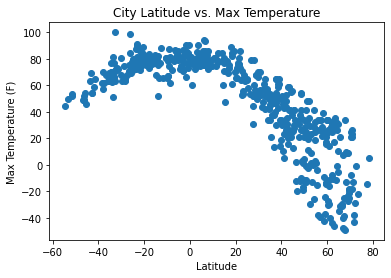

In [16]:
#build scatter plot
x_values1 = lat
y_values1 = max_temp
plt.scatter(x_values1,y_values1)

#graph properties
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
#plt.grid(b=True)

#save to png file
plt.savefig('output_data/Latitude_vs_Temperature.png')

#show plot
plt.show()

#In the cities with negative latitudes, max temperatures are generally in the same warmer temperature range as latitude becomes positive, there is definitely a trend downward in temperatures.

## Latitude vs. Humidity Plot

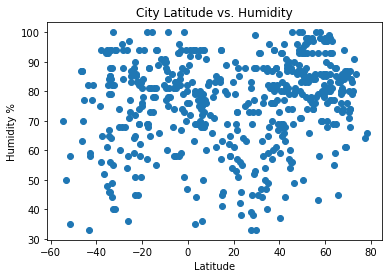

In [17]:
#build scatter plot
x_values2 = lat
y_values2 = humidity
plt.scatter(x_values2,y_values2)

#graph properties
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
#plt.grid(b=True)

#save to png file
plt.savefig('output_data/Latitude_vs_Humidity.png')

#show plot
plt.show()

### Based on this scattergraph, there does not appear to be a relationship between latitude and humidity

## Latitude vs. Cloudiness Plot

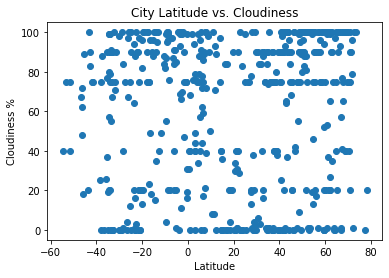

In [18]:
#build scatter plot
x_values3 = lat
y_values3 = cloudiness
plt.scatter(x_values3,y_values3)

#graph properties
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
#plt.grid(b=True)

#save to png file
plt.savefig('output_data/Latitude_vs_Cloudiness.png')

#show plot
plt.show()

### Based on this scattergraph, there does not appear to be a relationship between latitude and cloudiness

## Latitude vs. Wind Speed Plot

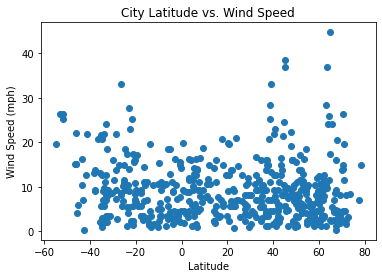

In [19]:
#build scatter plot
x_values4 = lat
y_values4 = wind_speed
plt.scatter(x_values4,y_values4)

#graph properties
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
#plt.grid(b=True)

#save to png file
plt.savefig('output_data/Latitude_vs_Wind_Speed.png')

#show plot
plt.show()

### Based on this scattergraph, there does not appear to be a relationship between latitude and windspeed.

## Linear Regression

In [20]:
#Create Northern Hemisphere DataFrame

nh_df = clean_city_df[clean_city_df['Lat'] >= 0].copy()
nh_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,3.510000e+02
mean,39.789534,18.419455,35.649516,76.578348,59.193732,8.875413,1.611771e+09
std,20.746385,92.893219,35.891101,14.923768,38.017245,6.610887,7.993061e+01
min,0.533300,-173.300000,-49.040000,33.000000,0.000000,0.290000,1.611770e+09
25%,23.070450,-70.252550,15.015000,69.000000,20.000000,4.310000,1.611771e+09
50%,42.300100,26.400000,37.400000,79.000000,75.000000,7.610000,1.611771e+09
75%,57.084900,101.129050,65.920000,87.000000,93.000000,11.630000,1.611771e+09
max,78.218600,179.316700,94.120000,100.000000,100.000000,44.740000,1.611771e+09


In [21]:
#Chart Inputs
nlat = nh_df['Lat']
nlng = nh_df['Lng']
nmax_temp = nh_df['Max Temp']
nhumidity = nh_df['Humidity']
ncloudiness = nh_df['Cloudiness']
nwind_speed = nh_df['Wind Speed']

In [22]:
#Create Southern Hemisphere DataFrame

sh_df = clean_city_df[clean_city_df['Lat'] < 0].copy()
sh_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,-21.892774,34.397208,73.470805,75.436782,59.850575,9.338276,1.611771e+09
std,13.440957,95.186405,10.289474,15.460336,36.794706,6.666030,7.506462e+01
min,-54.800000,-175.200000,44.600000,33.000000,0.000000,0.380000,1.611771e+09
25%,-33.033300,-51.547650,67.027500,65.000000,20.000000,3.440000,1.611771e+09
50%,-21.354250,28.520550,75.190000,79.500000,75.000000,8.150000,1.611771e+09
75%,-9.695600,133.159700,80.600000,87.000000,90.750000,13.125000,1.611771e+09
max,-0.358200,175.515300,100.000000,100.000000,100.000000,33.150000,1.611771e+09


In [23]:
#Chart Inputs
slat = sh_df['Lat']
slng = sh_df['Lng']
smax_temp = sh_df['Max Temp']
shumidity = sh_df['Humidity']
scloudiness = sh_df['Cloudiness']
swind_speed = sh_df['Wind Speed']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Latitude and Max Temperature is -0.85
The r_squared is: 0.7236427856155607


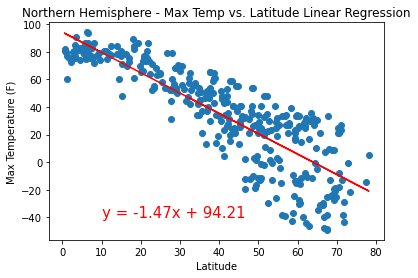

In [24]:
#Set up correlation formula
correlation = st.pearsonr(nlat, nmax_temp)

# Chart Inputs
nx_values1 = nlat
ny_values1 = nmax_temp

# Set up Regression formulas
(slope, intercept, rvalue,pvalue,stderr) = linregress(nx_values1,ny_values1)
regress_values = nx_values1 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Setu up scatter and regression chart
plt.scatter(nx_values1,ny_values1)
plt.plot (nx_values1,regress_values,"r-")

#Format Chart
plt.annotate(line_eq,(10,-40), fontsize=15, color = "red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')

#print correlationa and r_squared
print(f"The correlation between Latitude and Max Temperature is {round(correlation[0],2)}")
print(f"The r_squared is: {rvalue**2}")

#save to png file
plt.savefig('output_data/NH_Latitude_vs_Temperature_Regression.png')

#show plot
plt.show()

### This graph would indicate that in the Northern Hemisphere there is a relatively strong negative correlation between max temperature and latitude. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Latitude and Max Temperature is 0.64
The r_squared is: 0.4094195377807956


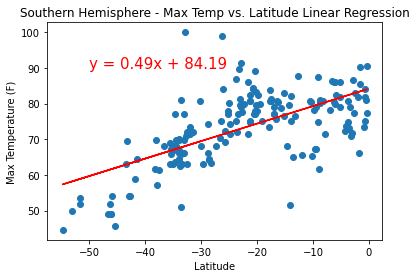

In [25]:
#Set up correlation formula
correlation = st.pearsonr(slat, smax_temp)

# Chart Inputs
sx_values1 = slat
sy_values1 = smax_temp

# Set up Regression formulas
(slope, intercept, rvalue,pvalue,stderr) = linregress(sx_values1,sy_values1)
regress_values = sx_values1 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Setu up scatter and regression chart
plt.scatter(sx_values1,sy_values1)
plt.plot (sx_values1,regress_values,"r-")

#Format Chart
plt.annotate(line_eq,(-50,90), fontsize=15, color = "red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')

#print correlationa and r_squared
print(f"The correlation between Latitude and Max Temperature is {round(correlation[0],2)}")
print(f"The r_squared is: {rvalue**2}")

#save to png file
plt.savefig('output_data/SH_Latitude_vs_Temperature_Regression.png')

#show plot
plt.show()

### This graph indicates that in the Southern Hemisphere there is a relatively weak positive correlation between max temperature and latitude.  I personally was a little surprise by this result.  I thought it would more mirror the Northern Hemisphere.  I need to get out more.¶

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Latitude and Humidity is 0.25
The r_squared is: 0.06154291439982312


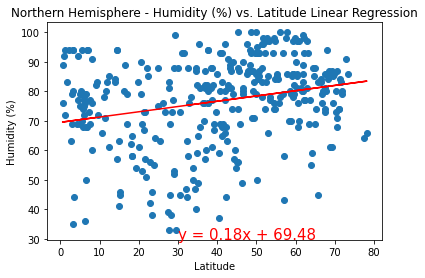

In [26]:
#Set up correlation formula
correlation = st.pearsonr(nlat, nhumidity)

# Chart Inputs
nx_values2 = nlat
ny_values2 = nhumidity

# Set up Regression formulas
(slope, intercept, rvalue,pvalue,stderr) = linregress(nx_values2,ny_values2)
regress_values = nx_values2 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Setu up scatter and regression chart
plt.scatter(nx_values2,ny_values2)
plt.plot (nx_values2,regress_values,"r-")

#Format Chart
plt.annotate(line_eq,(30,30), fontsize=15, color = "red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

#print correlationa and r_squared
print(f"The correlation between Latitude and Humidity is {round(correlation[0],2)}")
print(f"The r_squared is: {rvalue**2}")

#save to png file
plt.savefig('output_data/NH_Latitude_vs_Humidity_Regression.png')

#show plot
plt.show()

### This scattergraph would indicate that there is a very small positive relationship in the Northern Hemisphere between latitude and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Latitude and Humidity is 0.23
The r_squared is: 0.0532745127662321


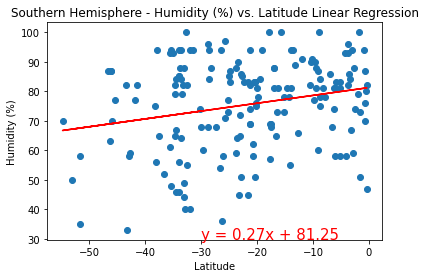

In [27]:
#Set up correlation formula
correlation = st.pearsonr(slat, shumidity)

# Chart Inputs
sx_values2 = slat
sy_values2 = shumidity

# Set up Regression formulas
(slope, intercept, rvalue,pvalue,stderr) = linregress(sx_values2,sy_values2)
regress_values = sx_values2 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Setu up scatter and regression chart
plt.scatter(sx_values2,sy_values2)
plt.plot (sx_values2,regress_values,"r-")

#Format Chart
plt.annotate(line_eq,(-30,30), fontsize=15, color = "red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

#print correlationa and r_squared
print(f"The correlation between Latitude and Humidity is {round(correlation[0],2)}")
print(f"The r_squared is: {rvalue**2}")

#save to png file
plt.savefig('output_data/SH_Latitude_vs_Humidity_Regression.png')

#show plot
plt.show()

### This scattergraph would indicate that there is a stronger (compared to the Northern Hemisphere), yet not strong, positive relationship in the Southern Hemisphere between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Latitude and Cloudiness is 0.18
The r_squared is: 0.03218064898739308


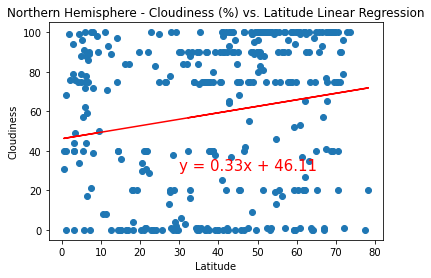

In [28]:
#Set up correlation formula
correlation = st.pearsonr(nlat, ncloudiness)

# Chart Inputs
nx_values3 = nlat
ny_values3 = ncloudiness

# Set up Regression formulas
(slope, intercept, rvalue,pvalue,stderr) = linregress(nx_values3,ny_values3)
regress_values = nx_values3 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Setu up scatter and regression chart
plt.scatter(nx_values3,ny_values3)
plt.plot (nx_values3,regress_values,"r-")

#Format Chart
plt.annotate(line_eq,(30,30), fontsize=15, color = "red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')

#print correlationa and r_squared
print(f"The correlation between Latitude and Cloudiness is {round(correlation[0],2)}")
print(f"The r_squared is: {rvalue**2}")

#save to png file
plt.savefig('output_data/NH_Latitude_vs_Cloudiness_Regression.png')

#show plot
plt.show()

### I am surprised by these results.  The scattergraph and the correlation do not appear to show any relationship between cloudiness and latitude in the Northern Hemisphere, but the line of regression appears to show a small positive relationship

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Latitude and Cloudiness is 0.13
The r_squared is: 0.016712796678734293


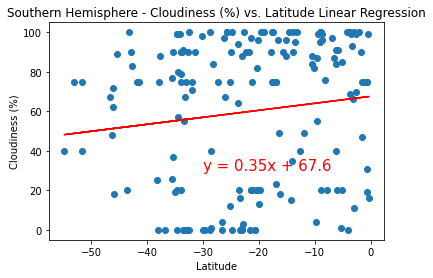

In [29]:
#Set up correlation formula
correlation = st.pearsonr(slat, scloudiness)

# Chart Inputs
sx_values3 = slat
sy_values3 = scloudiness

# Set up Regression formulas
(slope, intercept, rvalue,pvalue,stderr) = linregress(sx_values3,sy_values3)
regress_values = sx_values3 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Setu up scatter and regression chart
plt.scatter(sx_values3,sy_values3)
plt.plot (sx_values3,regress_values,"r-")

#Format Chart
plt.annotate(line_eq,(-30,30), fontsize=15, color = "red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

#print correlationa and r_squared
print(f"The correlation between Latitude and Cloudiness is {round(correlation[0],2)}")
print(f"The r_squared is: {rvalue**2}")

#save to png file
plt.savefig('output_data/SH_Latitude_vs_Cloudiness_Regression.png')

#show plot
plt.show()

### I have the same observation for the Southern Hemisphere as I do for the Northern Hemisphere.   Perhaps even more so.  

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Latitude and Wind Speed is -0.0
The r_squared is: 1.2801854016157234e-05


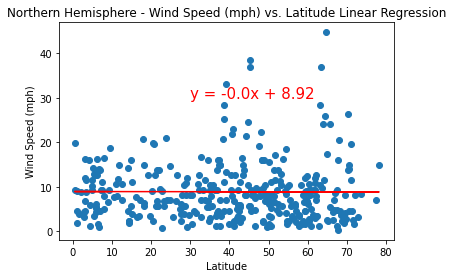

In [30]:
#Set up correlation formula
correlation = st.pearsonr(nlat, nwind_speed)

# Chart Inputs
nx_values4 = nlat
ny_values4 = nwind_speed

# Set up Regression formulas
(slope, intercept, rvalue,pvalue,stderr) = linregress(nx_values4,ny_values4)
regress_values = nx_values4 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Setu up scatter and regression chart
plt.scatter(nx_values4,ny_values4)
plt.plot (nx_values4,regress_values,"r-")

#Format Chart
plt.annotate(line_eq,(30,30), fontsize=15, color = "red")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

#print correlationa and r_squared
print(f"The correlation between Latitude and Wind Speed is {round(correlation[0],2)}")
print(f"The r_squared is: {rvalue**2}")

#save to png file
plt.savefig('output_data/NH_Latitude_vs_Wind_Speed_Regression.png')

#show plot
plt.show()

### There does not appear to be any relationship in the Northern Hemisphere between latitude and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Latitude and Wind Speed is -0.32
The r_squared is: 0.10529519641898985


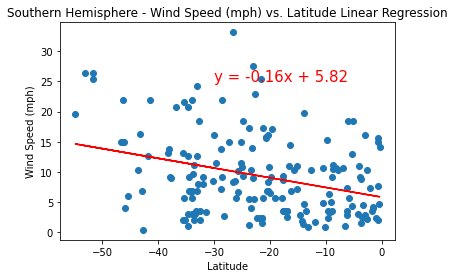

In [31]:
#Set up correlation formula
correlation = st.pearsonr(slat, swind_speed)

# Chart Inputs
sx_values4 = slat
sy_values4 = swind_speed

# Set up Regression formulas
(slope, intercept, rvalue,pvalue,stderr) = linregress(sx_values4,sy_values4)
regress_values = sx_values4 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Setu up scatter and regression chart
plt.scatter(sx_values4,sy_values4)
plt.plot (sx_values4,regress_values,"r-")

#Format Chart
plt.annotate(line_eq,(-30,25), fontsize=15, color = "red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

#print correlationa and r_squared
print(f"The correlation between Latitude and Wind Speed is {round(correlation[0],2)}")
print(f"The r_squared is: {rvalue**2}")

#save to png file
plt.savefig('output_data/SH_Latitude_vs_Wind_Speed_Regression.png')

#show plot
plt.show()

### There appears to be a small negative relationship between latitude and wind speed in the Southern Hemisphere.  